# Feature Importance:
* est dataset
* imputed missing values in pandas prior to running feature importance

In [68]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import io, s3fs, json
pd.set_option('display.max_columns', None)
print('Program run at', dt.now())

Program run at 2021-06-06 15:57:37.145198


In [69]:
est = pd.read_csv('s3://bleeding-hearts/workingdata/merge_est.csv')
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(143), object(4)
memory usage: 20.6+ MB


In [70]:
est.drop(columns=['Unnamed: 0'],inplace=True)
cols=list(est)
all_miss = []
for c in cols:
    if est[c].dtypes != object:
        est.loc[est[c] < 0, c] = np.nan
    if len(est) - est[c].count() == len(est):
        all_miss.append(c)
est.drop(columns=all_miss,inplace=True)
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 127 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(123), object(4)
memory usage: 17.6+ MB


In [116]:
means = {}
cols=list(est)
for c in cols:
    if len(est) - est[c].count() > 0:
        means[c] = est[c].dropna().mean()
est.fillna(value=means,inplace=True)
est.columns[est.isnull().any()]

Index([], dtype='object')

In [72]:
#make label lists
cat_labels = list(set(est['Child Opportunity Levels, overall COI, nationally-normed']))

In [73]:
#remove COI columns except for target: Child Opportunity Levels, overall COI, nationally-normed
cols=list(est)
coi_cols=cols[-8:]
coi_cols.remove('Child Opportunity Levels, overall COI, nationally-normed')
clean_cols = [i for i in cols if i not in coi_cols]
est = est[clean_cols]
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 120 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Levels, overall COI, nationally-normed
dtypes: float64(119), object(1)
memory usage: 16.7+ MB


In [94]:
est['FIPS']=est['FIPS'].astype('string')
est['FIPS'].dtype

StringDtype

In [95]:
from pandas import plotting
import matplotlib.pyplot as plt

# Ignore warnings from scikit-learn to make this notebook a bit nicer
import warnings
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)


from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
#Pipeline toolset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

#Model toolset
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

#from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance
from sklearn.utils import resample

from sklearn.model_selection import train_test_split as tts
from sklearn.impute import SimpleImputer

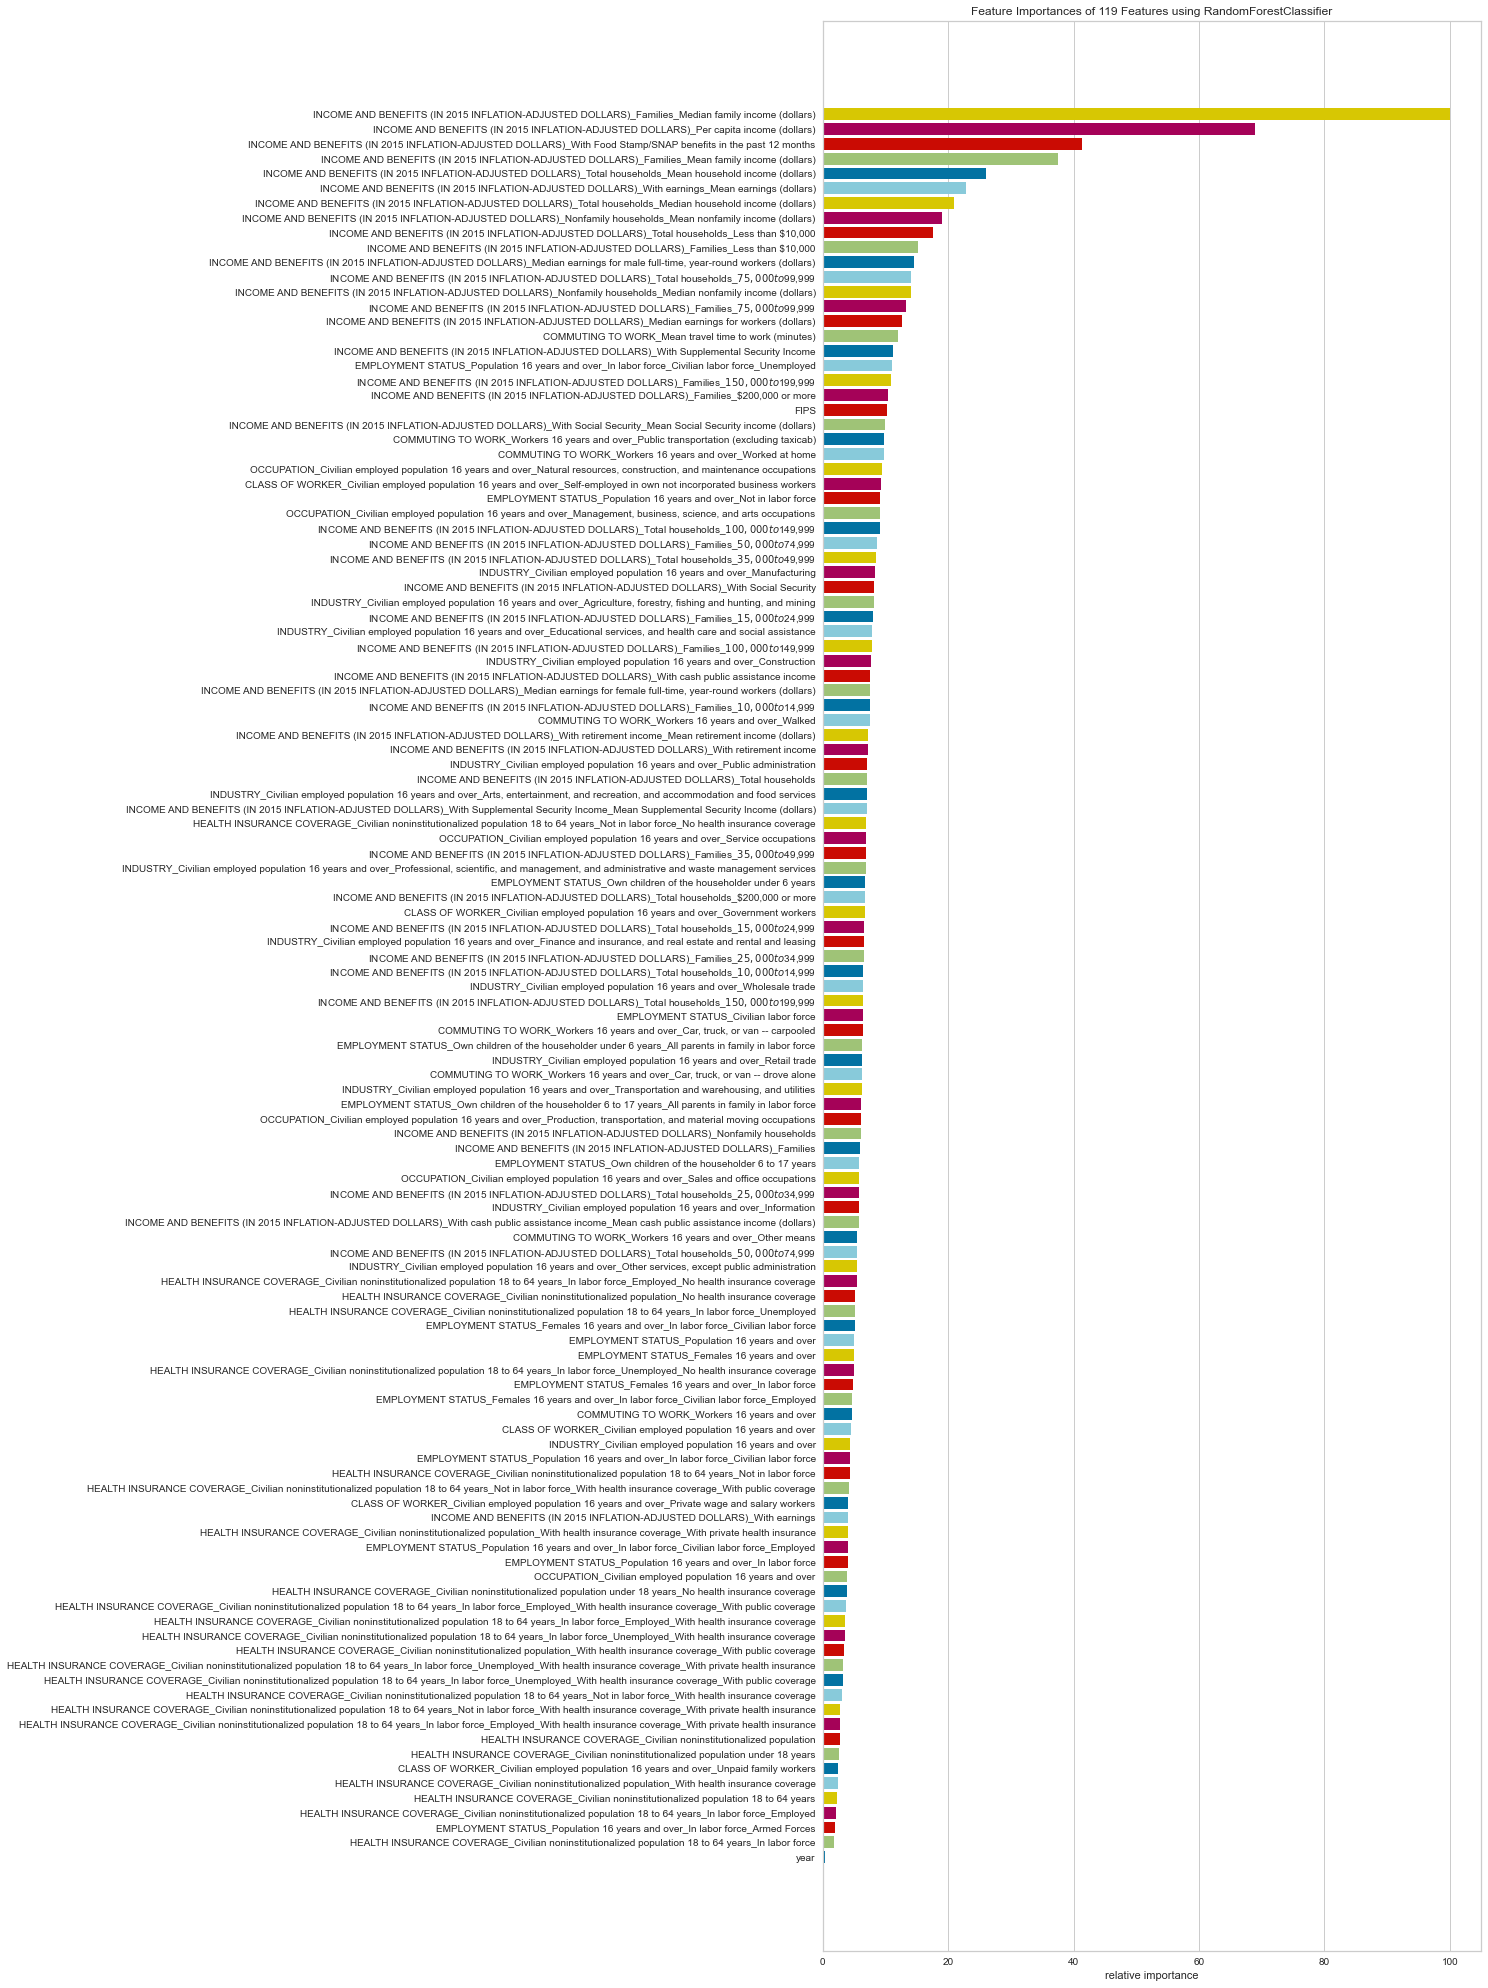

<AxesSubplot:title={'center':'Feature Importances of 119 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [129]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = est.loc[:, est.columns != 'Child Opportunity Levels, overall COI, nationally-normed']
y = est['Child Opportunity Levels, overall COI, nationally-normed']

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model,size=(1500, 2000))
viz.fit(X, y)
viz.show()